In [3]:
import os
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from warnings import simplefilter
import nltk

simplefilter(action='ignore', category=FutureWarning)

train_positive_path = '../Sentiment_Analysis/aclImdb/train/pos/'
train_negative_path = '../Sentiment_Analysis/aclImdb/train/neg/'
test_positive_path = '../Sentiment_Analysis/aclImdb/test/pos/'
test_negative_path = '../Sentiment_Analysis/aclImdb/test/neg/'

def read_files_in_path(path):
    positive_training_data=[]
    for filepath in glob.glob(os.path.join(path, '*.txt')):
        with open(filepath,encoding='utf8') as f:
            content = f.read()
            positive_training_data.append(content)
    return positive_training_data

#Read training data
positive_training_data = read_files_in_path(train_positive_path)
print(len(positive_training_data))
negative_training_data = read_files_in_path(train_negative_path)
print(len(negative_training_data))
whole_training_data = positive_training_data+negative_training_data
print(len(whole_training_data))

#Reading Test Data
positive_test_data = read_files_in_path(test_positive_path)
print(len(positive_test_data))
negative_test_data = read_files_in_path(test_negative_path)
print(len(negative_test_data))
whole_test_data = positive_test_data+negative_test_data
print(len(whole_test_data))

12500
12500
25000
12500
12500
25000


In [4]:
#Apply feature extraction: countVectorizer which is based on bag of words algorithm
vectorizer = CountVectorizer(ngram_range=(1,4))
train_vector = vectorizer.fit_transform(whole_training_data)
test_vector = vectorizer.transform(whole_test_data)
#create labels for the training data and test data first 12500 are positive and the remaining 12500 are negative
train_labels = np.asarray([1]*len(positive_training_data) + [0]*len(negative_training_data))
test_labels = np.asarray([1]*len(positive_test_data) + [0]*len(negative_test_data))

# #printing some visualization of the sizes of the train and test vectors 
# print(train_labels.shape)
# #train_vector has 25000 row corresponding to the 25000 review and 74849 feature extracted
# print(train_vector.shape)

# #print shapes of test vector and label

# print(test_labels.shape)
# print(test_vector.shape)

# #some visualization for th labels arrays
# print(train_labels)
# print(test_labels)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

clf = GridSearchCV(MultinomialNB(),{'alpha':[0.5,0.8,1.0,2.0,3.0]},cv=5,return_train_score=False)
clf.fit(train_vector, train_labels)
df=pd.DataFrame(clf.cv_results_)
print(df[['param_alpha','mean_test_score']])

  param_alpha  mean_test_score
0         0.5          0.84380
1         0.8          0.84808
2           1          0.84972
3           2          0.85428
4           3          0.85468


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=3)
scores = cross_val_score(clf, train_vector, train_labels, cv=5)
print(scores*100)
print("Mean Accuracy: %0.2f  (+/- %0.2f deviation) " % (scores.mean()*100, scores.std()))

[86.   85.   86.58 84.5  85.26]
Mean Accuracy: 85.47  (+/- 0.01 deviation) 


In [11]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB(alpha=3)
gnb.fit(train_vector, train_labels)
print("Naive Bayes with no preprocessing & using CountVectorizer classification accuracy:\n",gnb.score(test_vector,test_labels)*100,"%")

Naive Bayes with no preprocessing & using CountVectorizer classification accuracy:
 87.636 %


In [12]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[11139  1361]
 [ 1730 10770]]


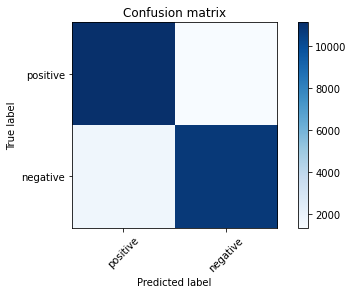

In [13]:
from sklearn.metrics import confusion_matrix
test_predicted=gnb.predict(test_vector)
cm=confusion_matrix(test_labels, test_predicted)
plot_confusion_matrix(cm, labels=["positive","negative"])
print(cm)